<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Task_6/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Loading Data**

In [ ]:

# load dataset

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable

**Splitting Data**

In [ ]:
#train test split

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [ ]:
# Create Decision Tree classifer object

# Train Decision Tree Classifer

#Predict the response for test dataset


**Evaluating Model**

In [ ]:
# Model Accuracy, how often is the classifier correct?


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [ ]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


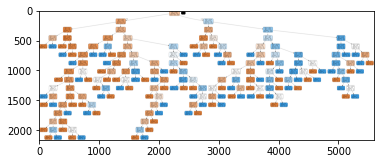

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus



**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [ ]:
# Create Decision Tree classifer object

# Train Decision Tree Classifer

#Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?

**Visualizing Decision Trees**

**Implement Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Create RandomForest Tree classifer object

# Train RandomForest Tree Classifer

#Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?

If the model overfitting try out different way to fix it!!

### All the best!!! I hope you will Enjoy the Task!